In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('/content/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

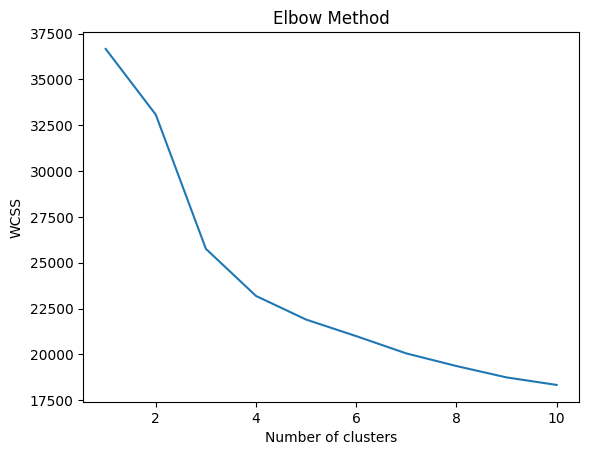

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(scaled_data)
  score = silhouette_score(scaled_data, kmeans.labels_)
  silhouette_scores.append(score)

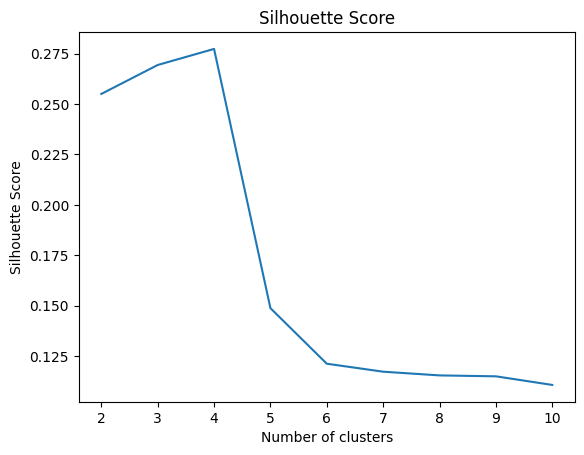

In [28]:
plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=7, random_state=42)

In [35]:
df['Cluster'] = kmeans.labels_
print(df.groupby('Cluster').mean())

            Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Cluster                                                                 
0        0.437037    103.411111         0.000000  0.144444   0.416778   
1        0.000000    129.921136         1.000000  0.000000   0.081498   
2        0.082774    105.816555         0.881432  1.000000   3.222394   
3        0.022807     98.570175         1.000000  0.001754   0.065895   
4        1.000000    101.479866         1.000000  0.030201   0.118356   
5        0.039906     96.356808         1.000000  1.000000   2.326174   
6        0.000000     75.267442         1.000000  0.000000   0.076919   

         CustServCalls     DayMins    DayCalls  MonthlyCharge  OverageFee  \
Cluster                                                                     
0             1.462963  183.564444  100.533333      53.075185   10.142926   
1             1.809148  202.597161  101.777603      51.253470    9.122855   
2             1.516779  206.130649